In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/cleaned_dataset.csv')

In [4]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1.0,0.0,0.0,0.0,1.0,1.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1.0,0.0,0.0,0.0,1.0,0.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1.0,0.0,0.0,0.0,1.0,1.0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1.0,1.0,0.0,0.0,1.0,0.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df.drop(columns="car", inplace=True)

In [6]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [7]:
df['has_children'].unique()

array([0., 1.])

In [8]:
df['Y']

,Y
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
5824,1.0
5825,0.0
5826,1.0
5827,0.0


In [9]:
#on analysisng i found that only temperature is a numerical col ebvery other col is stored categoricallu

<Axes: ylabel='temperature'>

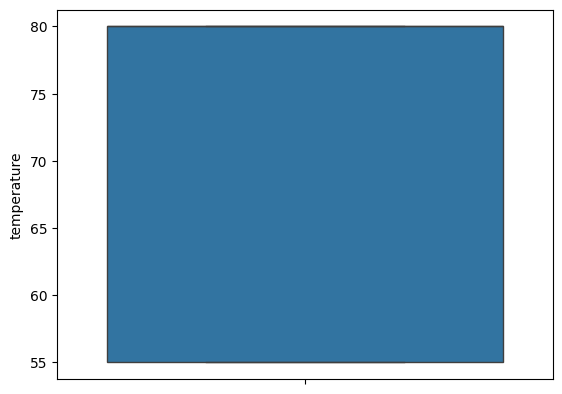

In [10]:
sns.boxplot(df['temperature'])

<ipython-input-11-436bae9b2a43>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temperature'])


<Axes: xlabel='temperature', ylabel='Density'>

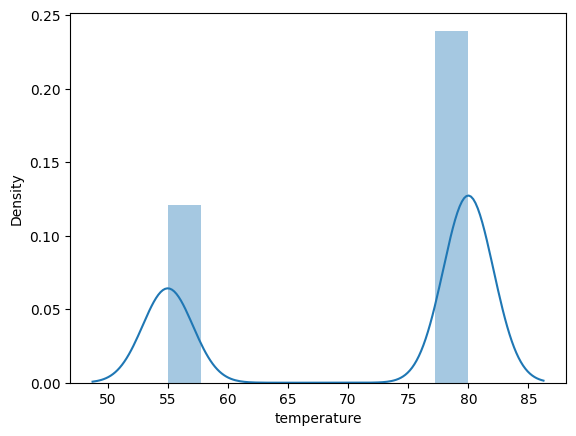

In [11]:
sns.distplot(df['temperature'])

In [12]:
#applying capping
df['temperature'].describe()

,temperature
count,5829.000000
mean,71.619489
std,11.802699
min,55.000000
25%,55.000000
50%,80.000000
75%,80.000000
max,80.000000


In [13]:
iqr=df['temperature'].quantile(0.75)-df['temperature'].quantile(0.25)

In [14]:
upper_limit=df['temperature'].quantile(0.75)+(1.5*iqr)
lower_limit=df['temperature'].quantile(0.25)-(1.5*iqr)

In [15]:
df['temperature']=np.where(df['temperature']>upper_limit,upper_limit,np.where(df['temperature']<lower_limit,lower_limit,df['temperature']))

<Axes: ylabel='temperature'>

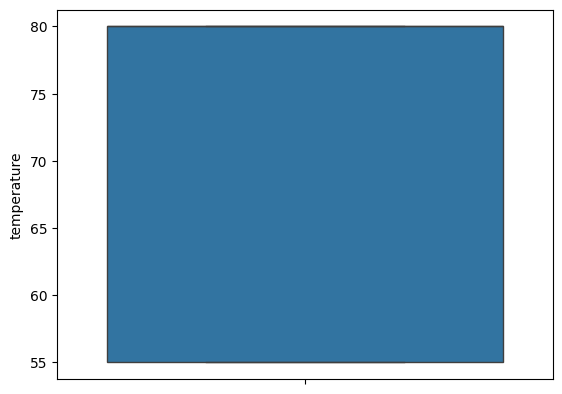

In [16]:
sns.boxplot(df['temperature'])

Hndling imbalanced data

In [17]:
!pip install  -U imbalanced-learn

In [18]:
x=df.drop(columns='Y')
y=df['Y']

<Axes: ylabel='count'>

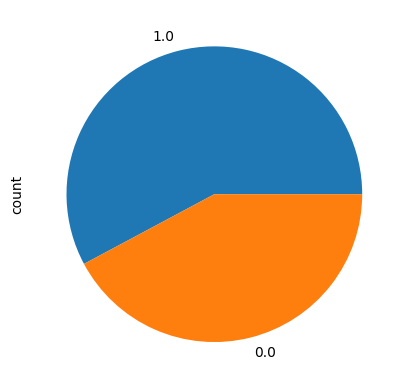

In [22]:
y.value_counts().plot.pie() # as we see that types of 1 more than 0

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

1. Random Undersamping

<Axes: ylabel='count'>

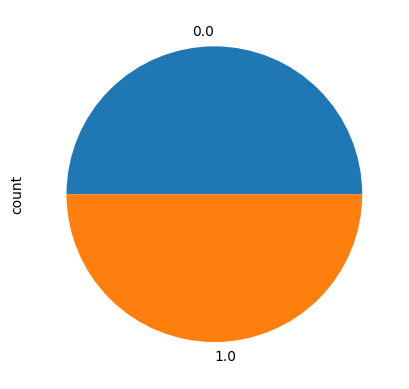

In [30]:
#well reeduvce size of majpority
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
x_rus,y_rus=rus.fit_resample(x,y)
# ater resampling
y_rus.value_counts().plot.pie()
#as we can see that we have sucessfullly handled imbalancd




2. Random Oversampling

<Axes: ylabel='count'>

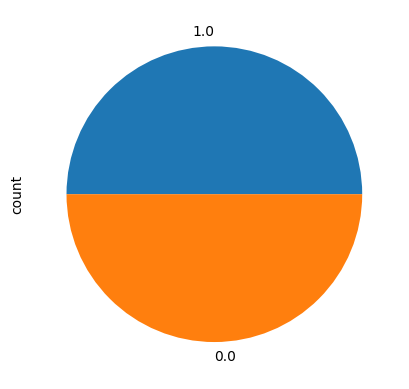

In [31]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
# ater resampling
y_ros.value_counts().plot.pie()
